# Library

In [1]:
import types
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import os
from google.colab import drive
import glob
import fnmatch
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load

In [2]:
drive.mount('/content/gdrive', force_remount = True)
root_dir = '/content/gdrive/My Drive/Alexnet/'
data_dir = root_dir + 'img2'
train_dir = root_dir + 'img2/train/'
val_dir = root_dir + 'img2/val'
os.listdir(data_dir)

Mounted at /content/gdrive


['an2i',
 'boland',
 'at33',
 'danieln',
 'glickman',
 'cheyer',
 'choon',
 'ch4f',
 'bpm',
 'karyadi',
 'mitchell',
 'kawamura',
 'phoebe',
 'kk49',
 'megak',
 'sz24',
 'night',
 'saavik',
 'steffi',
 'tammo',
 'train',
 'val']

# Count data

In [3]:
print("Left train: " + str(len(os.listdir(train_dir + '/left_train'))))
print("Right train: " + str(len(os.listdir(train_dir + '/right_train'))))
print("Up train: " + str(len(os.listdir(train_dir + '/up_train'))))
print("Straight train: " + str(len(os.listdir(train_dir + '/straight_train'))))
print("*"*30)
print("Left val: " + str(len(os.listdir(val_dir + '/left_val'))))
print("Right val: " + str(len(os.listdir(val_dir + '/right_val'))))
print("Up val: " + str(len(os.listdir(val_dir + '/up_val'))))
print("Left val: " + str(len(os.listdir(val_dir + '/straight_val'))))

Left train: 213
Right train: 213
Up train: 214
Straight train: 213
******************************
Left val: 162
Right val: 162
Up val: 164
Left val: 162


# Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 853 images belonging to 4 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 650 images belonging to 4 classes.


# Model

In [8]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='softmax')
])

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.optimizers.Adam(0.001), metrics = ['accuracy'])

In [10]:
history = model.fit(train_generator, steps_per_epoch = 25, epochs = 100, validation_data = validation_generator, validation_steps = 5, verbose = 2)

Epoch 1/100
25/25 - 254s - loss: 2.3668 - accuracy: 0.2801 - val_loss: 2.9964 - val_accuracy: 0.2313 - 254s/epoch - 10s/step
Epoch 2/100
25/25 - 87s - loss: 1.5588 - accuracy: 0.3321 - val_loss: 2.6275 - val_accuracy: 0.2125 - 87s/epoch - 3s/step
Epoch 3/100
25/25 - 72s - loss: 1.3903 - accuracy: 0.4018 - val_loss: 1.6877 - val_accuracy: 0.2875 - 72s/epoch - 3s/step
Epoch 4/100
25/25 - 62s - loss: 1.2167 - accuracy: 0.4449 - val_loss: 1.2856 - val_accuracy: 0.3438 - 62s/epoch - 2s/step
Epoch 5/100
25/25 - 63s - loss: 1.1497 - accuracy: 0.4829 - val_loss: 1.2712 - val_accuracy: 0.4375 - 63s/epoch - 3s/step
Epoch 6/100
25/25 - 52s - loss: 1.1240 - accuracy: 0.5095 - val_loss: 1.2382 - val_accuracy: 0.3750 - 52s/epoch - 2s/step
Epoch 7/100
25/25 - 51s - loss: 0.9711 - accuracy: 0.5856 - val_loss: 1.6211 - val_accuracy: 0.3313 - 51s/epoch - 2s/step
Epoch 8/100
25/25 - 52s - loss: 0.9617 - accuracy: 0.5843 - val_loss: 1.8634 - val_accuracy: 0.2688 - 52s/epoch - 2s/step
Epoch 9/100
25/25 - 4

# Test



Saving boland_left_angry_open.jpg to boland_left_angry_open.jpg
1/1 [==============================] - 0s 296ms/step
Right
boland_left_angry_open.jpg


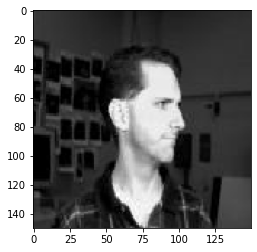

In [11]:
get_upload = files.upload()

for foto in get_upload.keys():
  path = foto
  img = keras.utils.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  pred_class = int(classes.argmax(axis=-1))
  if (pred_class==0):
      print("Left")
  elif (pred_class==1):
      print("Right")
  elif (pred_class==2):
      print("Up")
  elif (pred_class==3):
      print("Straight")
  print(foto)